In [3]:
pip install osmnx

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [5]:
import osmnx as ox
import matplotlib.pyplot as plt


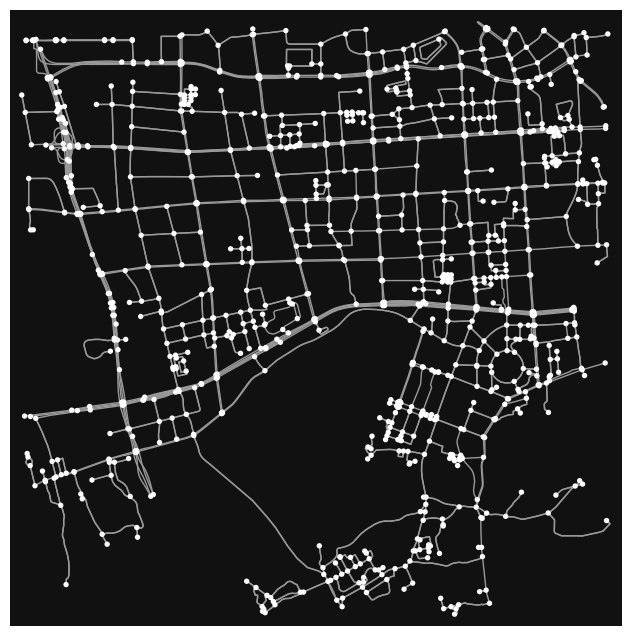

In [126]:
place_name = "Gudang, Hangzhou, China"

# fetch OSM street network (drive, walk, private, etc.) from the location
graph = ox.graph_from_address(place_name, network_type='drive', dist=3100)
fig, ax = ox.plot_graph(graph)

In [142]:
nodes, edges = ox.graph_to_gdfs(graph)

# Filter nodes that have the 'highway' attribute set to 'traffic_signals'
traffic_lights = nodes[nodes['highway'] == 'traffic_signals']
# print(traffic_lights)
# 30.275918, 120.100727
# 30.276076, 120.110777
# 30.281993, 120.109132
# 30.281756, 120.099814
# 30.286588, 120.098738
# 30.294818, 120.097855
# 30.294894, 120.097944
30.295046, 120.097944
30.300075, 120.097855


x, y =30.299823,	120.100979

# print(traffic_lights.filter(['y', 'x']==['30.281835', '120.109041']))
target_node = traffic_lights[(abs(traffic_lights['x'] - y) < 0.015) & (abs(traffic_lights['y'] - x) < 0.015)]
# osmid_of_target_node = target_node['id'].values[0]
target_node
# print(traffic_lights['geometry'])


,y,x,highway,street_count,geometry
osmid,,,,,
26197725,30.289834,120.114164,traffic_signals,4,POINT (120.11416 30.28983)
27127994,30.289162,120.102989,traffic_signals,4,POINT (120.10299 30.28916)
27127995,30.288749,120.093942,traffic_signals,4,POINT (120.09394 30.28875)
27128014,30.288670,120.093956,traffic_signals,4,POINT (120.09396 30.28867)
27128015,30.288985,120.103046,traffic_signals,4,POINT (120.10305 30.28899)
33720423,30.289213,120.102816,traffic_signals,4,POINT (120.10282 30.28921)
33720424,30.289040,120.102869,traffic_signals,4,POINT (120.10287 30.28904)
33992588,30.289362,120.109010,traffic_signals,4,POINT (120.10901 30.28936)
90414413,30.299864,120.101112,traffic_signals,4,POINT (120.10111 30.29986)


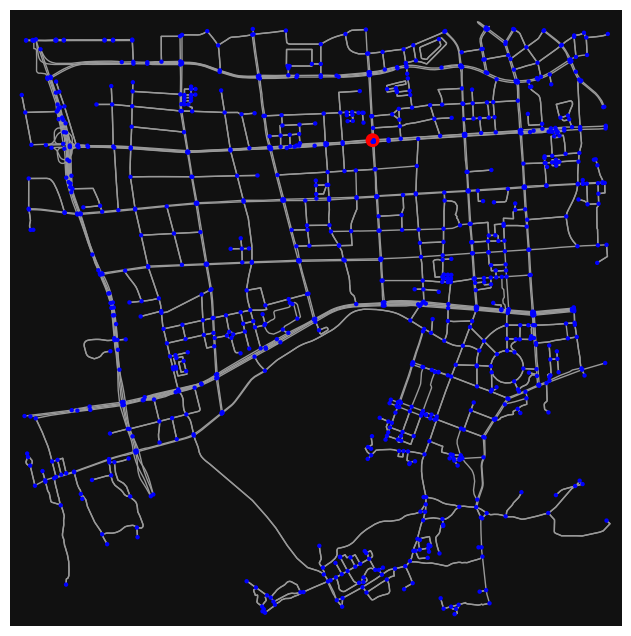

In [151]:
# Suppose the node IDs of the two nodes you want to highlight are 1234567890 and 9876543210
# node1_id = 26197709 # 30.284443	120.114585         2, 3
# node1_id = 3382408994 # 30.278606	120.115016      1,3
# node1_id = 26496837 # 30.278366	120.106039     1,2
# node1_id = 26607405  # 30.284117	120.10446     2,2
# node1_id = 271683606  # 30.283821	120.094933   2,1
# node1_id = 332556598 # 30.288751	120.093849   3,1
# node1_id =  33720424 # 30.289040	120.102869      3,2
# node1_id = 262910008 # 30.289688	120.114313      3,3
node1_id = 26197725

# Create a list of node colors: default color for most nodes and a special color for the highlighted nodes
nc = ['r' if node == node1_id else 'b' for node in graph.nodes()]

# Create a list of node sizes: larger size for the highlighted nodes and default size for the rest
ns = [100 if node == node1_id else 10 for node in graph.nodes()]

# Plot the graph with the specified node colors and sizes
fig, ax = ox.plot_graph(graph, node_color=nc, node_size=ns)

In [ ]:
# print(edges['highway'].value_counts())
# print(edges.columns)

# # Get all the edges that are trunk roads
# trunk_edges = [(u, v, k, d) for u, v, k, d in graph.edges(keys=True, data=True) if d['highway'] == 'primary']

# # Extract nodes from these edges
# trunk_nodes = set()
# for u, v, k, d in trunk_edges:
#     trunk_nodes.add(u)
#     trunk_nodes.add(v)

# # Filter out nodes that are not intersections
# intersection_nodes = [node for node in trunk_nodes if graph.degree(node) >= 4]

# # Plot the graph and highlight the intersection nodes
# fig, ax = ox.plot_graph(graph, node_color='gray', show=False, close=False)
# ax.scatter(nodes.loc[intersection_nodes]['x'], nodes.loc[intersection_nodes]['y'], color='red', s=100)
# plt.show()
